In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import linalg as la
import copy
import random

<h2>Задание 1 ,  Многочлен Лагранжа <h2>

In [11]:
def f1(x):
    return np.exp(2*x)*math.cos(3*x)

def f2(x):
    return math.sin(math.log(x, np.e))

def f3(x):
    return math.log(x, np.e)

def f4(x):
    return math.cos(x) + math.sin(x)


In [12]:
def Lagranj(f, X, x):
    y = []
    n = len(X) - 1
    for i in X:
        y.append(f(i))
    sum = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (x - X[j])/(X[i] - X[j])
        sum += y[i] * p
    return sum
        

In [13]:
def f_build(X, F, f, a, b, kol, values):
    for i in values:
        print(abs(F(f, X, i) - f(i)))  
    a_x = []
    a_y = []
    b_x = []
    b_y = []
    
    interval = (b - a)/kol
    
    for i in range(kol):
        a_x.append(a + interval*i)
        a_y.append(f(a + interval*i))
        
    for i in range(kol):
        b_x.append(a + interval*i)
        b_y.append(F(f, X, a + interval*i))
        
    fig, ax = plt.subplots()
    plt.plot(a_x, a_y, "-b", label="orig")
    plt.plot(a_x, a_y, "orange", label="inter")
    plt.legend(loc="upper left")
    ax.plot(a_x, a_y)
    ax.plot(b_x, b_y)
    ax.plot()
        

a
0.09581166023334764
1.1123954768600082
8.574112347328187
10.255427017796448
33.99791856983346
73.20338196772786
b
1.0581276383900469
0.7824776307514988
0.32358287604716773
0.2596822915492734
0.009072324253727615
0.0005404821488743661
c
0.42107634129169136
0.09277450411025212
8.726949906842293e-05
4.504029297772161e-05
0.06447369404921788
0.25075999340907995
d
0.0
0.0001410217892294785
0.02867601369725792
0.04009161959869201
0.1244271799006802
0.021464559995533317


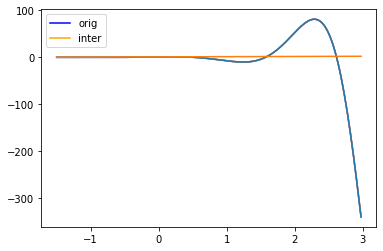

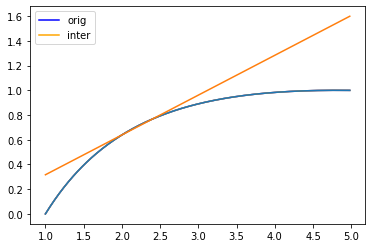

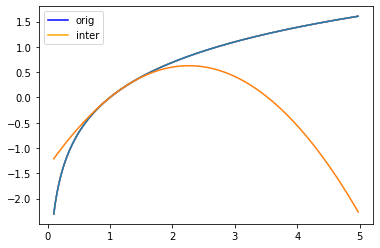

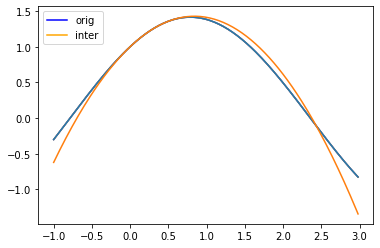

In [14]:
values = [0.25, 0.51, 0.99, 1.09, 1.89, 2.39]
#a
print("a")
X = [0, 0.3, 0.6]
f_build(X, Lagranj, f1, -1.5, 3, 200, values)
 
#b
print("b")
X = [2.0, 2.4, 2.6]
f_build(X, Lagranj, f2, 1, 5, 200, values)

#c
print("c")
X = [1, 1.1, 1.3, 1.4]
f_build(X, Lagranj, f3, 0.1, 5, 200, values)

#d
print("d")
X = [0, 0.25, 0.5, 1.0]
f_build(X, Lagranj, f4, -1, 3, 200, values)


<h2>Задание 1 , метод наименьших квадратов <h2>

In [15]:
def min_kvadrat(f, X, x):
    n = len(X)
    y = []
    for i in X:
        y.append(f(i))
    s1 = 0
    for i in range(n):
        s1 += X[i]*y[i]
    s2 = 0
    for i in X: 
        s2 += i**2
        
    a = (s1*n - np.sum(X)*np.sum(y))/(n*s2 - np.sum(X)**2)
    b = (np.sum(y) - a*np.sum(X))/n
    
    return a*x + b 
    
    
    

a
0.6007196449493379
0.26768634803036506
5.578324971346644
6.923034318670912
40.023153854110944
80.9116438677253
b
1.0995574069947387
0.8180848372820178
0.3484407372099826
0.28230070576048316
0.013775162852098122
0.007034878308528447
c
0.761832401332827
0.26728221853215833
0.007187308916582473
0.00504086738741126
0.11655884610657052
0.30184158818750284
d
0.04491376451015272
0.09609687188419413
0.052580919504417345
0.1241161182038335
1.1250064707596417
1.988138835479068


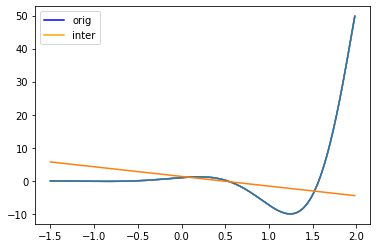

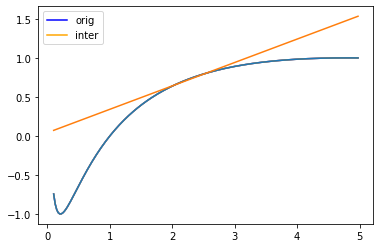

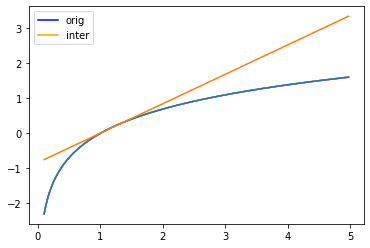

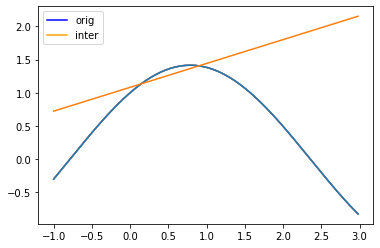

In [16]:
values = [0.25, 0.51, 0.99, 1.09, 1.89, 2.39]
#a
print("a")
X = [0, 0.3, 0.6]
f_build(X, min_kvadrat, f1, -1.5, 2, 200, values)
#b
print("b")
X = [2.0, 2.4, 2.6]
f_build(X, min_kvadrat, f2, 0.1, 5, 200, values)

#c
print("c")
X = [1, 1.1, 1.3, 1.4]
f_build(X, min_kvadrat, f3, 0.1, 5, 200, values)

#d
print("d")
X = [0, 0.25, 0.5, 1.0]
f_build(X, min_kvadrat, f4, -1, 3, 200, values)

<h2>Задание 1 , многочлен Ньютона <h2>

In [17]:
def r_func(X, f):
    if len(X) == 1:
        return f(X[len(X) - 1])
    x1 = []
    x2 = []
    for i in range(1, len(X)):
        x1.append(X[i])
    for i in range(0, len(X) - 1):
        x2.append(X[i])    
    return (r_func(x1, f) - r_func(x2, f))/(X[len(X) - 1] - X[0])

def Newton(f, X, x):
    sum = 0
    for i in range(len(X)):
        x_push = []
        for j in range(i + 1):
            x_push.append(X[j])
        p = 1
        for j in range(i):
            p *= (x-X[j])
        sum += r_func(x_push, f) * p
    return sum
            
    
    

a
0.044440557743316234
0.08928552676404845
0.909609139339457
0.5937322258200233
67.71567378916728
129.24929028894658
b
0.5666156876576022
0.4145980813939872
0.13754641915997154
0.10395301674046308
0.0017437341046006027
3.100796738431111e-05
c
0.2892057124991323
0.04778059032604498
2.0090586772233618e-05
7.806233083357261e-06
0.017249945273118183
0.13428333012683502
d
0.0
3.5846069709633e-05
0.00020290001784606382
0.00275630226214596
0.2173101486896224
0.7452707184778807


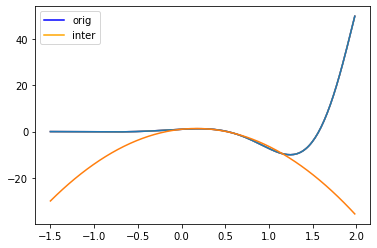

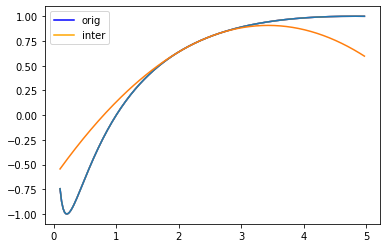

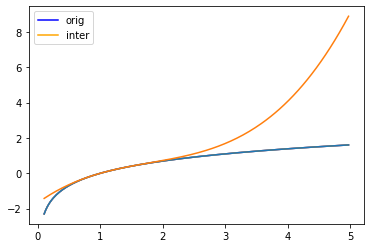

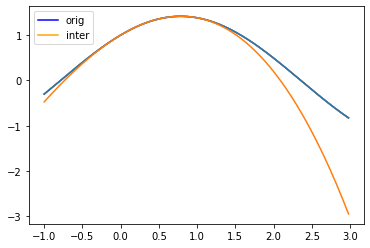

In [18]:
values = [0.25, 0.51, 0.99, 1.09, 1.89, 2.39]
#a
print("a")
X = [0, 0.3, 0.6]
f_build(X, Newton, f1, -1.5, 2, 200, values)

#b
print("b")
X = [2.0, 2.4, 2.6]
f_build(X, Newton, f2, 0.1, 5, 200, values)

#c
print("c")
X = [1, 1.1, 1.3, 1.4]
f_build(X, Newton, f3, 0.1, 5, 200, values)

#d
print("d")
X = [0, 0.25, 0.5, 1.0]
f_build(X, Newton, f4, -1, 3, 200, values)

<h2>Задание 2 <h2>

<h2>метод наименьших квадратов</h2>

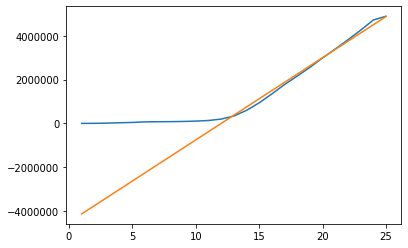

In [19]:
def summ(X):
    S = 0
    for i in range(len(X)):
        S += i
    return S
        
def min_kvadrat(X, Y):
    n = len(X)
    xy = 0
    for i in range(n):
        xy += X[i] * Y[i]
    xy *= n
    x_sqr = 0
    for i in range(n):
        x_sqr += (X[i])**2
    x_sqr *= n
    xy -= summ(X) * summ(Y)
    x_sqr -= (summ(X))**2
    a = xy/x_sqr
    b = (summ(Y) - a*summ(X))/n
    return (a, b)

date = []
cases = [580, 4581, 14533, 31439, 45134, 71329, 77673, 81820, 90443, 106099, 134510, 198171, 337705, 597457, 940523, 1346822,
        1775429, 2161885, 2556720, 2989175, 3394153, 3815902, 4252290, 4717009, 4888124]
for i in range(1, 26):
    date.append(i)

a, b = min_kvadrat(date, cases)
plt.plot(date, cases)
interplt = []
for i in date:
    interplt.append(a * i + b)
plt.plot(date, interplt)

<h2>метод сплайнов</h2>

In [20]:
import pandas as pd
import numpy as np
def jacobi(A, b, x0, tol, n_iterations=300):
    """
    Performs Jacobi iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.
    
    Returns:
    x, the estimated solution
    """
    
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations): #iteration level
        for i in range(0, n): #element wise level for x
            s = 0
            for j in range(0,n): #summation for i !=j
                if i != j:
                    s += A[i][j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i][i]
        #update values
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() #use new x for next iteration
        
    
    print("Number of Iterations: ", counter)
    print("Norm of Difference: ", x_diff)
    return x

In [21]:
def Jacobi(arr, b, error):
    
    size = len(b)
    B = np.zeros((size,size))
    
    for i in range(size):
        b[i] /= arr[i][i]
        for j in range(size):
            B[i][j] = arr[i][j]
            B[i][j] /= arr[i][i]
            
    for i in range(size):
        B[i][i] = 0
        
    B *= -1
    
    selfvalue = la.eig(B)
    
    x = copy.copy(b)
    for i in range(size):
        x[i] = 0

    while True:
        buffer = copy.copy(x)
        x = np.dot(B,x) + b
        if la.norm(x - buffer) < (1 - la.norm(B))*error/la.norm(B):
            break
    return x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Number of Iterations:  34
Norm of Difference:  7.377415787387846e-06


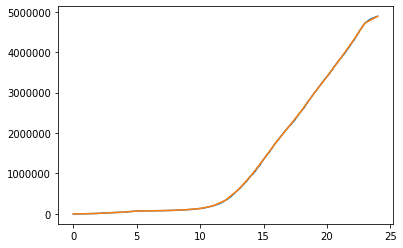

In [22]:
size = 25
date = []
cases = [580, 4581, 14533, 31439, 45134, 71329, 77673, 81820, 90443, 106099, 134510, 198171, 337705, 597457, 940523, 1346822,
        1775429, 2161885, 2556720, 2989175, 3394153, 3815902, 4252290, 4717009, 4888124]

    
for i in range(size):
    date.append(i)
print(date)
    
A = np.zeros((size,size))
delta_X = []
delta_Y = []

for i in range(1, size):
    delta_X.append(date[i] - date[i - 1])
    delta_Y.append(cases[i] - cases[i - 1])
    
A[0][0] = 1
A[size - 1][size - 1] = 1
b = np.zeros(shape=(size,1))
for i in range(1, size - 1):
    A[i][i - 1] = delta_X[i - 1]
    A[i][i] = 2*(delta_X[i - 1] + delta_X[i])
    A[i][i + 1] = delta_X[i]
    b[i][0] = (3 * (delta_Y[i]/delta_X[i] - delta_Y[i - 1]/delta_X[i - 1]))

c = jacobi(np.array(A), b,np.zeros(len(A)), 1e-05, 300)
d = []
b = []
a = []
for i in range(len(c) - 1):
    d.append((c[i + 1] - c[i])/(3*delta_X[i]))
    b.append(delta_Y[i]/delta_X[i] - delta_X[i]/3*(2*c[i] + c[i + 1]))
#c = Jacobi(A, b, 1e-05)
X = []
Y = []

for i in range(len(date) - 1):
    buffer = []
    for j in range(500):
        buffer.append(random.uniform(i, i + 1))
    buffer = sorted(buffer)
    for j in range(500):
        X.append(buffer[j])

for i in range((len(date) - 1)):
    for j in range(500):
        Y.append(cases[i] + b[i]*(X[j]) + c[i]*(X[j])**2 + d[i]*(X[j])**3)
plt.plot(X, Y)
plt.plot(date, cases)
plt.show()
        

<h2>Задание 3</h2>

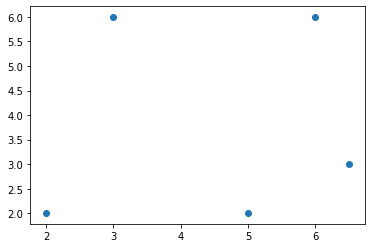

In [23]:
X = [3, 2, 6, 5, 6.5]
Y = [6, 2, 6, 2, 3]
x = []
for i in range(0,700):
    x.append(i/100)
y1 = []
y2 = []
for i in range(0, 700):
    y1.append(5.8*x[i] + 5.0)
    y2.append(5.0*x[i] + 5.8)
plt.scatter(X,Y)



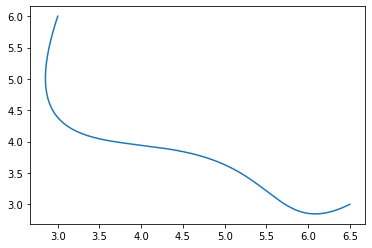

In [24]:
x = []
y = []
for t in np.linspace(0,1,10000):
    x.append(3*(1-t)**4 + 8*(1-t)**3*t + 36*(1-t)**2*t**2 + 20*(1-t)*t**3 + 6.5*t**4)
    y.append(6*(1-t)**4 + 8*(1-t)**3*t + 36*(1-t)**2*t**2 + 8*(1-t)*t**3 + 3*t**4)
plt.plot(x,y)